#### Download and load the titanic data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Titanic.csv')

#### Use Pandas to print out the first few rows of the data set.

In [2]:
print(df.sample(10))

     PassengerId  Survived  Pclass  \
352          353         0       3   
81            82         1       3   
597          598         0       3   
791          792         0       2   
716          717         1       1   
689          690         1       1   
309          310         1       1   
251          252         0       3   
605          606         0       3   
155          156         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
352                          Elias, Mr. Tannous    male  15.0      1      1   
81                  Sheerlinck, Mr. Jan Baptist    male  29.0      0      0   
597                         Johnson, Mr. Alfred    male  49.0      0      0   
791                         Gaskell, Mr. Alfred    male  16.0      0      0   
716               Endres, Miss. Caroline Louise  female  38.0      0      0   
689           Madill, Miss. Georgette Alexandra  female  15.0      0      1   
309              Francatelli

In [3]:
print(df.shape)

(891, 12)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


#### Which ones are numerical and categorical
Numerical: Age, SibSp, Fare  
Categorical: Survived, Pclass, Sex, Age, Parch, Cabin, Embarked

#### Use Pandas to do print out a summary of the data 

In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### Do box plots on the data frame

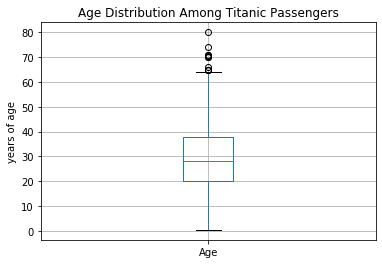

In [6]:
df[['Age']].boxplot()
plt.ylabel('years of age')
plt.title('Age Distribution Among Titanic Passengers')
plt.show()

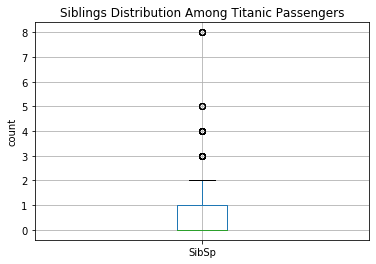

In [7]:
df[['SibSp']].boxplot()
plt.ylabel('count')
plt.title('Siblings Distribution Among Titanic Passengers')
plt.show()

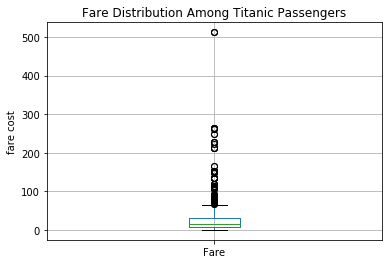

In [8]:
df[['Fare']].boxplot()
plt.ylabel('fare cost')
plt.title('Fare Distribution Among Titanic Passengers')
plt.show()

#### Create a histogram based on age.

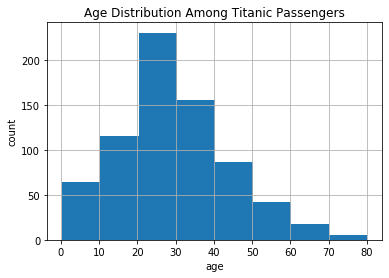

In [9]:
df['Age'].hist(bins=8)
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age Distribution Among Titanic Passengers')
plt.show()

#### Use groupby to group ages to those that survived.

In [10]:
df['Age'] = df['Age'].fillna(-1)
age_cutoff = [-10, 0, 15, 60, 80]
age_labels = ['unknown', 'young', 'adult', 'senior']
group = pd.cut(df.Age, bins=age_cutoff, labels=age_labels)
df.insert(6, 'Group', group)
survived_group = df[df.Survived == 1]['Group']

#### Calculate the ratio that survived to age group

In [11]:
print('Survival percentage among the age group:\n')
round(survived_group.value_counts() / df.Group.value_counts() * 100, 1) 

Survival percentage among the age group:



adult      38.8
unknown    29.4
young      59.0
senior     22.7
Name: Group, dtype: float64

In [12]:
df[df.Survived == 1]['Group'].value_counts()

adult      236
unknown     52
young       49
senior       5
Name: Group, dtype: int64

In [13]:
df.Group.value_counts()

adult      609
unknown    177
young       83
senior      22
Name: Group, dtype: int64